In [1]:
#Import libraries
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import pytz
from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mt5.initialize()# so mt5 has to be install on pc and open and logged in

True

In [3]:
login = 48438229
password = 'Mq3p8!tJ'
server = 'HFMarketsGlobal-Demo'

mt5.login(login, password, server)

True

In [4]:
# get the bar data
rates_H4 = mt5.copy_rates_from("GBPUSD", mt5.TIMEFRAME_H4, datetime.now(), 100)

In [5]:
ticker = "GBPUSD"
interval = mt5.TIMEFRAME_H4
from_date = datetime.now()
no_of_rows = 100

rates_H4 = mt5.copy_rates_from(ticker, interval, from_date, no_of_rows)
rates_H4

array([(1710892800, 1.27197, 1.27219, 1.27094, 1.27153,  4212, 16, 0),
       (1710907200, 1.27153, 1.27239, 1.27133, 1.27181,  4409, 16, 0),
       (1710921600, 1.27181, 1.2729 , 1.26859, 1.26916, 12030, 16, 0),
       (1710936000, 1.26917, 1.27   , 1.26837, 1.26992, 11146, 16, 0),
       (1710950400, 1.26992, 1.27207, 1.2697 , 1.27155, 11292, 16, 0),
       (1710964800, 1.27155, 1.27861, 1.27128, 1.27828, 28950, 16, 0),
       (1710979200, 1.27827, 1.28017, 1.27825, 1.27943,  8914, 16, 0),
       (1710993600, 1.27942, 1.27981, 1.27873, 1.27882,  7924, 16, 0),
       (1711008000, 1.27885, 1.28027, 1.27611, 1.27706, 18594, 16, 0),
       (1711022400, 1.27704, 1.27839, 1.27057, 1.27079, 20602, 16, 0),
       (1711036800, 1.27055, 1.2709 , 1.26525, 1.26547, 19424, 16, 0),
       (1711051200, 1.2655 , 1.26625, 1.26492, 1.26554,  5818, 16, 0),
       (1711065600, 1.26557, 1.26741, 1.26498, 1.26509,  5462, 16, 0),
       (1711080000, 1.26509, 1.26532, 1.26335, 1.26415,  9384, 16, 0),
      

In [6]:
account_info = mt5.account_info()
account_info

AccountInfo(login=48438229, trade_mode=0, leverage=500, limit_orders=300, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=5068.0, credit=0.0, profit=0.0, equity=5068.0, margin=0.0, margin_free=5068.0, margin_level=0.0, margin_so_call=50.0, margin_so_so=20.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Abdulbasit Olalekan Adebayo', server='HFMarketsGlobal-Demo', currency='USD', company='HF Markets (SV) Ltd.')

In [7]:
account_info.balance

5068.0

In [8]:
account_info.equity

5068.0

In [9]:
ohlc = pd.DataFrame(mt5.copy_rates_range('GBPUSD', mt5.TIMEFRAME_M30, datetime(2023,7,21), datetime.now()))
ohlc

,time,open,high,low,close,tick_volume,spread,real_volume
0,1689915600,1.28768,1.28793,1.28737,1.28778,943,16,0
1,1689917400,1.28779,1.28814,1.28751,1.28807,964,16,0
2,1689919200,1.28808,1.28850,1.28776,1.28792,1089,16,0
3,1689921000,1.28792,1.28809,1.28734,1.28752,871,16,0
4,1689922800,1.28753,1.28798,1.28733,1.28793,615,16,0
...,...,...,...,...,...,...,...,...
8953,1712835000,1.25647,1.25656,1.25494,1.25494,1886,16,0
8954,1712836800,1.25497,1.25523,1.25409,1.25427,1919,16,0
8955,1712838600,1.25426,1.25436,1.25319,1.25343,1526,16,0
8956,1712840400,1.25343,1.25388,1.25292,1.25379,1544,16,0


In [10]:
ohlc['time'] = pd.to_datetime(ohlc['time'], unit = 's')
ohlc

,time,open,high,low,close,tick_volume,spread,real_volume
0,2023-07-21 05:00:00,1.28768,1.28793,1.28737,1.28778,943,16,0
1,2023-07-21 05:30:00,1.28779,1.28814,1.28751,1.28807,964,16,0
2,2023-07-21 06:00:00,1.28808,1.28850,1.28776,1.28792,1089,16,0
3,2023-07-21 06:30:00,1.28792,1.28809,1.28734,1.28752,871,16,0
4,2023-07-21 07:00:00,1.28753,1.28798,1.28733,1.28793,615,16,0
...,...,...,...,...,...,...,...,...
8953,2024-04-11 11:30:00,1.25647,1.25656,1.25494,1.25494,1886,16,0
8954,2024-04-11 12:00:00,1.25497,1.25523,1.25409,1.25427,1919,16,0
8955,2024-04-11 12:30:00,1.25426,1.25436,1.25319,1.25343,1526,16,0
8956,2024-04-11 13:00:00,1.25343,1.25388,1.25292,1.25379,1544,16,0


In [11]:
# Calculate change in price percent
ohlc['change_percent'] = ((ohlc['close'] - ohlc['open']) / ohlc['open']) * 100


In [12]:
# Calculate change in from close price to open price for that timeframe
ohlc['change_in_TF'] = ((ohlc['close'] - ohlc['open']))


In [13]:
# Calculate daily change in close price
ohlc['TF_change_close'] = ohlc['close'].diff()
ohlc

,time,open,high,low,close,tick_volume,spread,real_volume,change_percent,change_in_TF,TF_change_close
0,2023-07-21 05:00:00,1.28768,1.28793,1.28737,1.28778,943,16,0,0.007766,0.00010,NaN
1,2023-07-21 05:30:00,1.28779,1.28814,1.28751,1.28807,964,16,0,0.021743,0.00028,0.00029
2,2023-07-21 06:00:00,1.28808,1.28850,1.28776,1.28792,1089,16,0,-0.012422,-0.00016,-0.00015
3,2023-07-21 06:30:00,1.28792,1.28809,1.28734,1.28752,871,16,0,-0.031058,-0.00040,-0.00040
4,2023-07-21 07:00:00,1.28753,1.28798,1.28733,1.28793,615,16,0,0.031067,0.00040,0.00041
...,...,...,...,...,...,...,...,...,...,...,...
8953,2024-04-11 11:30:00,1.25647,1.25656,1.25494,1.25494,1886,16,0,-0.121770,-0.00153,-0.00154
8954,2024-04-11 12:00:00,1.25497,1.25523,1.25409,1.25427,1919,16,0,-0.055778,-0.00070,-0.00067
8955,2024-04-11 12:30:00,1.25426,1.25436,1.25319,1.25343,1526,16,0,-0.066174,-0.00083,-0.00084
8956,2024-04-11 13:00:00,1.25343,1.25388,1.25292,1.25379,1544,16,0,0.028721,0.00036,0.00036


In [14]:
ohlc.set_index('time', inplace=True)

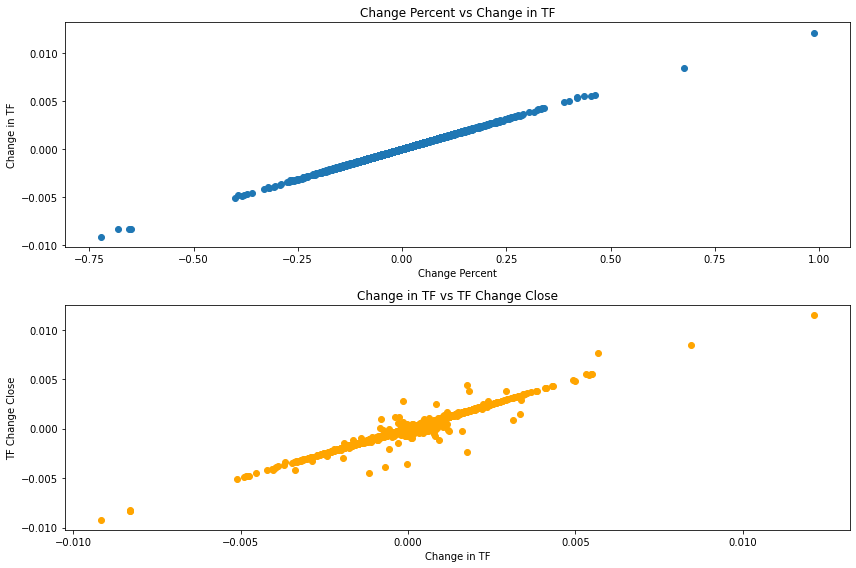

In [15]:
# Plotting
plt.figure(figsize=(12, 8))

# Scatter plot for change_percent vs change_in_TF
plt.subplot(2, 1, 1)
plt.scatter(ohlc['change_percent'], ohlc['change_in_TF'])
plt.title('Change Percent vs Change in TF')
plt.xlabel('Change Percent')
plt.ylabel('Change in TF')

# Scatter plot for change_in_TF vs TF_change_close
plt.subplot(2, 1, 2)
plt.scatter(ohlc['change_in_TF'], ohlc['TF_change_close'], color='orange')
plt.title('Change in TF vs TF Change Close')
plt.xlabel('Change in TF')
plt.ylabel('TF Change Close')

plt.tight_layout()
plt.show()

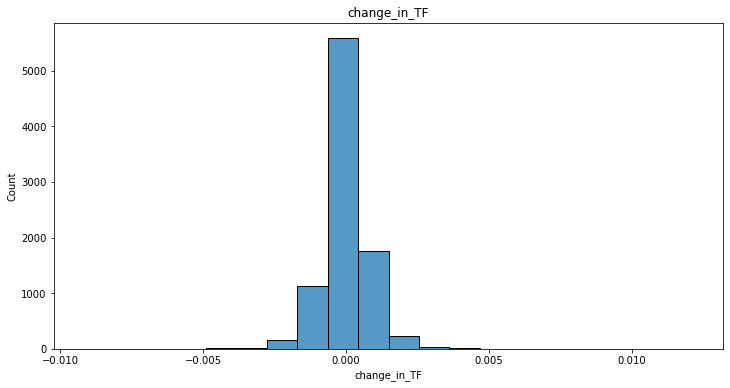

In [16]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.histplot(ohlc['change_in_TF'], bins=20)
plt.title('change_in_TF')
plt.xlabel('change_in_TF')
plt.ylabel('Count')
plt.show()

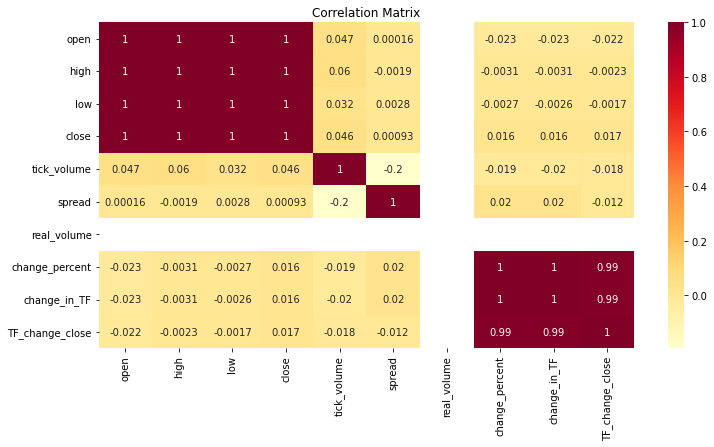

In [17]:
# Check Correlations
plt.figure(figsize=(12, 6))
numeric_cols = ohlc.select_dtypes(include='number').columns
corr_matrix = ohlc[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

In the correlation matrix you sent, the variables are listed on the left-hand side and at the top of the table. The correlation coefficient between each pair of variables is shown in the body of the table. For example, the correlation coefficient between the variable "open" and the variable "high" is 1. This indicates that there is a perfect positive correlation between the opening price of a stock and its high price for the day.

Here are some other observations that can be made from the correlation matrix:

The variable "change_percent" has a very strong positive correlation with the variables "daily_change_close" and "TF_change_close". This indicates that there is a strong positive correlation between the percentage change in a stock price and the daily change in the closing price and the change in the closing price of the underlying futures contract.
The variable "spread" has a weak negative correlation with the variable "tick_volume". This indicates that there is a weak negative correlation between the difference between the bid and ask price of a stock and the number of times the stock is traded.
The variable "real_volume" is not shown in the correlation matrix.
It is important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other variable to change. There may be a third variable that is causing both of the other variables to change.

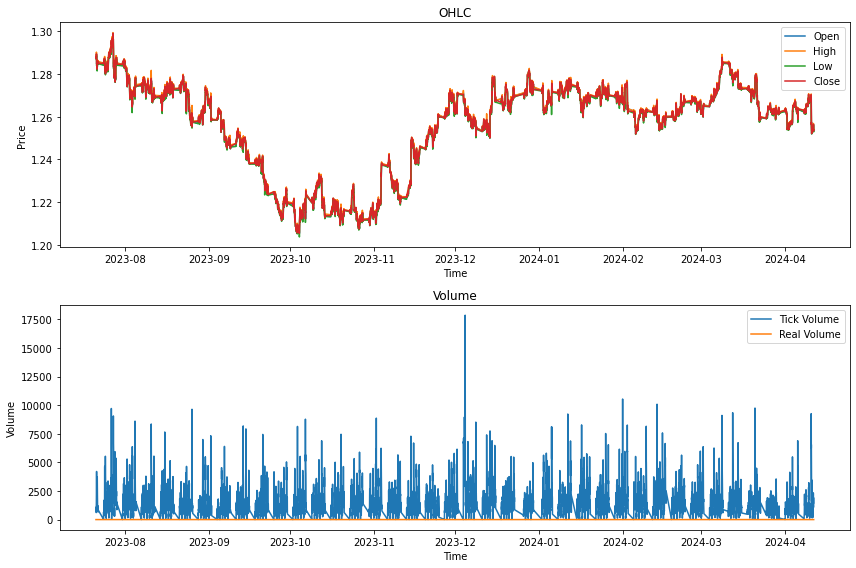

In [18]:
# Plotting
plt.figure(figsize=(12, 8))

# Plotting OHLC (open, high, low, close)
plt.subplot(2, 1, 1)
plt.plot(ohlc.index, ohlc['open'], label='Open')
plt.plot(ohlc.index, ohlc['high'], label='High')
plt.plot(ohlc.index, ohlc['low'], label='Low')
plt.plot(ohlc.index, ohlc['close'], label='Close')
plt.title('OHLC')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plotting volume
plt.subplot(2, 1, 2)
plt.plot(ohlc.index, ohlc['tick_volume'], label='Tick Volume')
plt.plot(ohlc.index, ohlc['real_volume'], label='Real Volume')
plt.title('Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

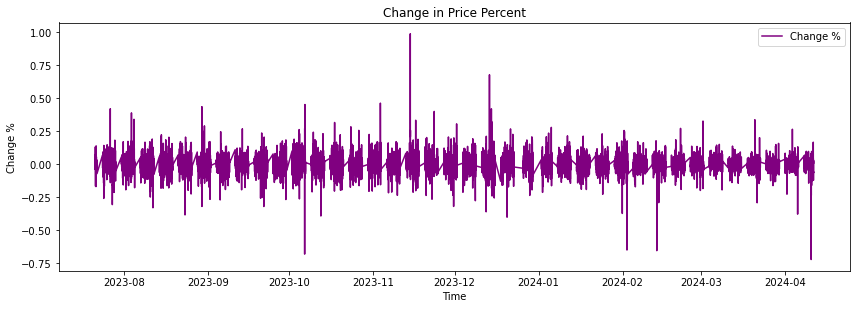

In [19]:
plt.figure(figsize=(12, 8))

# Plotting change in price percent
plt.subplot(2, 1, 2)
plt.plot(ohlc.index, ohlc['change_percent'], color='purple', label='Change %')
plt.title('Change in Price Percent')
plt.xlabel('Time')
plt.ylabel('Change %')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
symbol = 'GBPUSD'

request = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": 0.01,
    "type": mt5.ORDER_TYPE_BUY,
    "price": mt5.symbol_info_tick(symbol).ask,
    "sl": 1.24540,
    "tp": 1.26440,
    "comment": 'Py bot',
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_IOC
    
}

#Send a trading request
result = mt5.order_send(request)

result

OrderSendResult(retcode=10030, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Unsupported filling mode', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='GBPUSD', volume=0.01, price=1.25449, stoplimit=0.0, sl=1.2454, tp=1.2644, deviation=0, type=0, type_filling=1, type_time=0, expiration=0, comment='Py bot', position=0, position_by=0))

In [24]:
symbol = 'GBPUSD'

request = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": 0.01,
    "type": mt5.ORDER_TYPE_SELL,
    "price": mt5.symbol_info_tick(symbol).bid,
    "sl": 1.26540,
    "tp": 1.24440,
    "comment": 'Py bot 2',
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_IOC
    
}

#Send a trading request
result = mt5.order_send(request)

result

OrderSendResult(retcode=10030, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Unsupported filling mode', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='GBPUSD', volume=0.01, price=1.2542900000000001, stoplimit=0.0, sl=1.2654, tp=1.2444, deviation=0, type=1, type_filling=1, type_time=0, expiration=0, comment='Py bot 2', position=0, position_by=0))